# Data Modeling
Zuerst vorbereitete Daten einlesen

In [10]:
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn import tree

cleaned_data = pd.read_csv('cleaned_data.csv')

### test test 

### Robert 
--Predict the category of crime that occurred given a certain time and location

#### Location aufteilen in Dummy Varibalen 


In [11]:
# Spalte LOCATION wird zu mehrere 0,1 Variablen um diese im Suchbaum abzubilden 

# One-Hot Encoding für das String-Feature "LOCATION"
area_names = list(map(lambda x: 'AREA.NAME_' + x, set(cleaned_data['AREA.NAME'].values)))
encoded_data = pd.get_dummies(cleaned_data, columns=['AREA.NAME'])
cleaned_data = pd.concat([encoded_data], axis=1)
# Anzeigen des transformierten DataFrames
print(area_names)
cleaned_data['RD'] = cleaned_data['RD'].astype(str)

# Definiere eine Funktion, um die letzten beiden Zeichen einer Zeichenkette zu entfernen
def remove_last_two_chars(text):
    return text[:-1]

# Wende die Funktion auf die Spalte "RD" an und speichere das Ergebnis in einer neuen Spalte "New_RD"
cleaned_data['New_RD'] = cleaned_data['RD'].apply(remove_last_two_chars)
cleaned_data['New_RD'] = cleaned_data['New_RD'].astype(int)
# Gib den aktualisierten DataFrame aus
cleaned_data


cleaned_data['New_RD'] = cleaned_data['New_RD'].astype(str)
rd_nr = list(map(lambda x: 'New_RD_' + x, set(cleaned_data['New_RD'].values)))
encoded_data = pd.get_dummies(cleaned_data, columns=['New_RD'])
cleaned_data = pd.concat([encoded_data], axis=1)
print(rd_nr)

# Gib den aktualisierten DataFrame aus
cleaned_data


['AREA.NAME_Pacific', 'AREA.NAME_77th Street', 'AREA.NAME_Wilshire', 'AREA.NAME_Foothill', 'AREA.NAME_Harbor', 'AREA.NAME_Southwest', 'AREA.NAME_Hollywood', 'AREA.NAME_West Valley', 'AREA.NAME_Devonshire', 'AREA.NAME_Southeast', 'AREA.NAME_Newton', 'AREA.NAME_Van Nuys', 'AREA.NAME_Hollenbeck', 'AREA.NAME_Rampart', 'AREA.NAME_Olympic', 'AREA.NAME_N Hollywood', 'AREA.NAME_Mission', 'AREA.NAME_Central', 'AREA.NAME_Topanga', 'AREA.NAME_Northeast', 'AREA.NAME_West LA']
['New_RD_193', 'New_RD_130', 'New_RD_199', 'New_RD_73', 'New_RD_14', 'New_RD_59', 'New_RD_151', 'New_RD_13', 'New_RD_86', 'New_RD_155', 'New_RD_124', 'New_RD_99', 'New_RD_127', 'New_RD_50', 'New_RD_42', 'New_RD_208', 'New_RD_10', 'New_RD_97', 'New_RD_31', 'New_RD_126', 'New_RD_167', 'New_RD_201', 'New_RD_35', 'New_RD_11', 'New_RD_187', 'New_RD_170', 'New_RD_137', 'New_RD_202', 'New_RD_132', 'New_RD_71', 'New_RD_92', 'New_RD_195', 'New_RD_203', 'New_RD_160', 'New_RD_171', 'New_RD_175', 'New_RD_56', 'New_RD_142', 'New_RD_34', '

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,...,New_RD_90,New_RD_91,New_RD_92,New_RD_93,New_RD_94,New_RD_95,New_RD_96,New_RD_97,New_RD_98,New_RD_99
0,2013-03-20,132007717.0,2013-03-20,20:15:00,20,2004,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,2013-03-10,130608787.0,2013-03-10,04:45:00,6,635,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
2,2013-12-18,131820260.0,2013-12-18,07:45:00,18,1839,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
3,2013-10-18,131817514.0,2013-10-18,17:30:00,18,1827,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
4,2013-05-26,130510483.0,2013-05-25,20:00:00,5,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215684,2016-12-27,121925197.0,2016-12-27,19:55:00,19,1981,997,TRAFFIC DR #,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1215685,2016-12-13,141323386.0,2016-12-13,22:15:00,13,1352,624,BATTERY - SIMPLE ASSAULT,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1215686,2016-12-30,122120521.0,2016-12-30,19:50:00,21,2143,624,BATTERY - SIMPLE ASSAULT,AA,Adult Arrest,...,0,0,0,0,0,0,0,0,0,0
1215687,2016-12-14,121430255.0,2016-12-14,21:55:00,14,1413,997,TRAFFIC DR #,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame mit den Spalten "RD" und "LAT" erstellt.
# Du kannst deine Daten in den DataFrame "df" laden.

# Definiere die benutzerdefinierte Aggregationsfunktion, um den Mittelwert von "LAT" und den entsprechenden Wert von "RD" zu erhalten

# Konvertiere die Spalte "RD" in einen String-Datentyp
cleaned_data['RD'] = cleaned_data['RD'].astype(str)

# Definiere eine Funktion, um die letzten beiden Zeichen einer Zeichenkette zu entfernen
def remove_last_two_chars(text):
    return text[:-1]

# Wende die Funktion auf die Spalte "RD" an und speichere das Ergebnis in einer neuen Spalte "New_RD"
cleaned_data['RD'] = cleaned_data['RD'].apply(remove_last_two_chars)


def custom_agg(series):
    return pd.Series({
        'LAT_mean': series['LAT'].mean(),
        'LONG_mean': series['LONG'].mean(),
        'RD_value': series.iloc[0]
    })

# Gruppiere den DataFrame nach der Spalte "RD" und wende die benutzerdefinierte Aggregationsfunktion an
result = cleaned_data.groupby('RD')['LAT', 'LONG'].apply(custom_agg).reset_index()

# Gib das Ergebnis aus
print(result)

C:\Users\Robert.Janus.OFFICE\AppData\Local\Temp\ipykernel_5312\1238366635.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = cleaned_data.groupby('RD')['LAT', 'LONG'].apply(custom_agg).reset_index()


      RD   LAT_mean   LONG_mean  \
0     10  34.067516 -118.245035   
1    100  34.212309 -118.520930   
2    101  34.204511 -118.519117   
3    102  34.196417 -118.521112   
4    103  34.188643 -118.520934   
..   ...        ...         ...   
199   95  34.168465 -118.456567   
200   96  34.160934 -118.435129   
201   97  34.154837 -118.449596   
202   98  34.151007 -118.444093   
203   99  34.141521 -118.437657   

                                              RD_value  
0    LAT      34.0710
LONG   -118.2302
Name: 475, d...  
1    LAT      34.2084
LONG   -118.5535
Name: 96, dt...  
2    LAT      34.2029
LONG   -118.5593
Name: 651, d...  
3    LAT      34.1939
LONG   -118.4815
Name: 120, d...  
4    LAT      34.1866
LONG   -118.5559
Name: 373, d...  
..                                                 ...  
199  LAT      34.1649
LONG   -118.4596
Name: 361, d...  
200  LAT      34.1621
LONG   -118.4301
Name: 216, d...  
201  LAT      34.1513
LONG   -118.4509
Name: 630, d...  
202  LAT 

In [3]:
result.to_csv('ergebnis.csv', index=False)

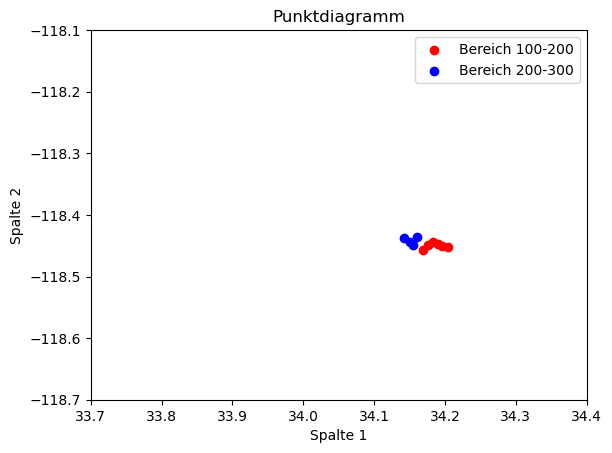

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die CSV-Datei in einen DataFrame
df = pd.read_csv('ergebnis.csv')

# Wähle die gewünschten Spalten aus
df_filtered1 = df[df['RD'].between(90, 95)]
df_filtered2 = df[df['RD'].between(96, 99)]
df_filtered3 = df[df['RD'].between(120, 140)]
df_filtered4 = df[df['RD'].between(140, 160)]
spalte1_1 = df_filtered1['LAT_mean']
spalte2_1 = df_filtered1['LONG_mean']
spalte1_2 = df_filtered2['LAT_mean']
spalte2_2 = df_filtered2['LONG_mean']
spalte1_3 = df_filtered3['LAT_mean']
spalte2_3 = df_filtered3['LONG_mean']
spalte1_4 = df_filtered4['LAT_mean']
spalte2_4 = df_filtered4['LONG_mean']
# Erstelle das Punktdiagramm

plt.scatter(spalte1_1, spalte2_1, c='red', label='Bereich 100-200')
plt.scatter(spalte1_2, spalte2_2, c='blue', label='Bereich 200-300')
#plt.scatter(spalte1_3, spalte2_3, c='green', label='Bereich 100-200')
#plt.scatter(spalte1_4, spalte2_4, c='yellow', label='Bereich 200-300')

plt.xlabel('Spalte 1')
plt.ylabel('Spalte 2')
plt.title('Punktdiagramm')
plt.legend()

# Setze die Range der x- und y-Achse auf feste Werte
x_range = (33.7, 34.4 )
y_range = (-118.7, -118.1)
plt.xlim(x_range)
plt.ylim(y_range)
plt.show()

In [99]:
cleaned_data.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,...,New_RD_90,New_RD_91,New_RD_92,New_RD_93,New_RD_94,New_RD_95,New_RD_96,New_RD_97,New_RD_98,New_RD_99
0,2013-03-20,132007717.0,2013-03-20,20:15:00,20,2004,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,2013-03-10,130608787.0,2013-03-10,04:45:00,6,635,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
2,2013-12-18,131820260.0,2013-12-18,07:45:00,18,1839,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
3,2013-10-18,131817514.0,2013-10-18,17:30:00,18,1827,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
4,2013-05-26,130510483.0,2013-05-25,20:00:00,5,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0


In [100]:
cleaned_data.columns

Index(['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'RD', 'Crm.Cd',
       'CrmCd.Desc', 'Status', 'Status.Desc',
       ...
       'New_RD_90', 'New_RD_91', 'New_RD_92', 'New_RD_93', 'New_RD_94',
       'New_RD_95', 'New_RD_96', 'New_RD_97', 'New_RD_98', 'New_RD_99'],
      dtype='object', length=254)

modelle
xgboost
multilayerperception

#### DecisionTree 1/4
- features = ['UNIX.TIMESTAMP','LAT','LONG', 'RD'] + area_names
- target = 'CRIME_CAT'

In [7]:
dec_tree = tree.DecisionTreeClassifier()
features = ['UNIX.TIMESTAMP','LAT','LONG', 'RD'] + area_names
target = 'CRIME_CAT'

selection = features + [target]

predict_data = cleaned_data[selection].copy()

X_train, X_test, y_train, y_test = train_test_split(predict_data.drop(target, axis=1), predict_data[target], test_size=0.2, random_state=42)
dec_tree.fit(X_train,y_train)

print("Model Accuracy:")
dec_tree.score(X_test,y_test)

Model Accuracy:


0.26021025096858574

#### DecisionTree 2/4
- features = ['AREA', 'RD']
- target = 'CRIME_VIOLENT'

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#import graphviz
from sklearn.tree import export_graphviz

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = [ 'RD'] + area_names
target = 'CRIME_VIOLENT'

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)



# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

#hier funktionier features = [ 'RD'] + area_names besser als rd_nr

Genauigkeit des Modells: 0.7417639365298719


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#import graphviz
from sklearn.tree import export_graphviz

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = area_names #['RD'] #+ 
target = 'CRIME_CAT'

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)



# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 80)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)
#0.19066538344479267 -> rd area n=8
#0.21751022053319513 -> rd area n = 80
#0.19213779828739236 -> rd_nr n=80
#hier funktionier features = [ 'RD'] + area_names besser als rd_nr

Genauigkeit des Modells: 0.18272750454474412


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#import graphviz
from sklearn.tree import export_graphviz

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = rd_nr
target = 'Crm.Cd'

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)



# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 80)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

#0.17654994283082034


Genauigkeit des Modells: 0.17654994283082034


#### DecisionTree 3/4

- features = ['AREA', 'RD']
- target = 'Crm.Cd'

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#import graphviz
from sklearn.tree import export_graphviz

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
column_list = rd_nr
features = column_list
target = 'Crm.Cd'

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)


# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 250)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.1766280877526343


#### DecisionTree 4/4
- features = ['AREA', 'RD',  'LAT', 'LONG']
- target = 'CRIME_CAT'


In [ ]:
predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
features = ['AREA', 'RD',  'LAT', 'LONG']
target = 'CRIME_CAT'

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.4242322215497916


In [12]:
anzahl_unterschiedliche_werte = cleaned_data['RD'].nunique()

print("Anzahl unterschiedlicher Werte:", anzahl_unterschiedliche_werte)

Anzahl unterschiedlicher Werte: 1303


#### DecisionForest 1/3
- features = ['AREA', 'RD', 'LAT', 'LONG']
- target = 'CRIME_CAT'

Bisher bestes Ergebnis!

In [10]:
#Forrest

predict_data = cleaned_data.copy()
from sklearn.ensemble import RandomForestClassifier
# Schritt 2: Merkmale und Zielvariable definieren
features = ['AREA', 'RD', 'LAT', 'LONG']
target = 'CRIME_CAT'

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

# Schritt 4: Modell erstellen und trainieren

model = RandomForestClassifier(max_depth = 21, n_estimators=10)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells deep: " , accuracy)
#deep = 16, nest = 10 : 46,6%
#deep = 16 nest = 100 : 46,9
#deep = 20 nest = 10: 47,62%
#deep = 32 nest = 10 : 46,8 - ab n= 32 wird es nicht besser
#iteration von 16-32 durchgeführt. Beste Genauigkeit bon deep = 21: 48,63%
#Genauigkeit des Modells deep = 21, n_est = 10 :  0.49558042601795105 

Genauigkeit des Modells deep:  0.30659131851047555


#### DecisionForest 2/3
- Target: CRIME_CAT
- Features: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos', and ALL LOCATION 

In [ ]:
#Forrest

predict_data = cleaned_data.copy()
from sklearn.ensemble import RandomForestClassifier
# Schritt 2: Merkmale und Zielvariable definieren
#features = ['AREA', 'RD', 'LAT', 'LONG']
target = 'CRIME_CAT'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION.street', 
                     'Cross.Street.street', 'LOCATION.house_number', 'Cross.Street.house_number','UNIX.TIMESTAMP', 'TIME.OCC_hour', 
                     'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos', and all LOCATION
features = predict_data.drop([target] + column_to_exclude, axis=1).columns
# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

maxd = 21
nest = 10

model = RandomForestClassifier(max_depth = maxd, n_estimators=nest)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells deep: " + str(maxd) + ", " + "n_est: " + str(nest) + ": " +  str(accuracy))

#iteration von 16-32 durchgeführt. Beste Genauigkeit bon deep = 21: 48,63%
#Genauigkeit des Modells deep: 16, 10: 0.4599616398945097
#Genauigkeit des Modells deep: 30, n_est: 100: 0.44278838896436595
#Genauigkeit des Modells deep: 21, n_est: 100: 0.47115444382286864
#Genauigkeit des Modells deep: 20, n_est: 100: 0.47222000230871003
#Genauigkeit des Modells deep: 20, n_est: 40: 0.47016880222346535
#Genauigkeit des Modells deep: 19, n_est: 100: 0.47237983608158624

#['ASSAULT_BATTERY_AND_ROBBERY', 'CHILD_ABUSE', 'CHILD_NEGLECT', 'DISTURBANE_OF_PUBLIC_ORDER', 'FIREARMS_AND_EXPLOSIVES_OFFENSES', 'FRAUD_AND_COUNTERFEIT', 'HARASSMENT', 'HOMICIDE', 'KIDNAPPING', 'OTHER_NON_VIOLENT_CRIME', 'POLICE_CRIMES', 'PROPERTY_CRIMES', 'SEXUAL_CRIMES', 'SEXUAL_OFFENSES', 'SPECIAL_NON_VIOLENT_CRIME', 'SPECIAL_VIOLENT_CRIMES', 'THREAT_OFFENSES', 'VIOLATION_OF_POLICE_OR_COURT_ORDER']


#Genauigkeit des Modells deep: 80, n_est: 20: 0.43948071783123327
#Genauigkeit des Modells deep: 10, n_est: 20: 0.4376248701350595
#Genauigkeit des Modells deep: 800, n_est: 100: 0.45589375974906027

<<<<<<< local


<<<<<<< local <removed>


Genauigkeit des Modells deep: 21, n_est: 10: 0.4460232357930088


>>>>>>> remote <modified: >


Genauigkeit des Modells deep: 80, n_est: 10: 0.36353446585804516


>>>>>>> remote


#### DecisionForest 3/3
- Target: Crm.Cd
- Features: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL LOCATIONS

In [ ]:
#Forrest

predict_data = cleaned_data.copy()
from sklearn.ensemble import RandomForestClassifier
# Schritt 2: Merkmale und Zielvariable definieren
#features = ['AREA', 'RD', 'LAT', 'LONG']
target = 'Crm.Cd'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION.street', 
                     'Cross.Street.street', 'LOCATION.house_number', 'Cross.Street.house_number','UNIX.TIMESTAMP', 'TIME.OCC_hour', 
                     'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos', and all LOCATION
features = predict_data.drop([target] + column_to_exclude, axis=1).columns
# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

maxd = 21
nest = 10

model = RandomForestClassifier(max_depth = maxd, n_estimators=nest)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells deep: " + str(maxd) + ", " + "n_est: " + str(nest) + ": " +  str(accuracy))

In [12]:
predict_data = cleaned_data.copy()
from sklearn.ensemble import RandomForestClassifier
# Schritt 2: Merkmale und Zielvariable definieren
#features = ['AREA', 'RD', 'LAT', 'LONG']
target = 'Crm.Cd'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION.street', 
                     'Cross.Street.street', 'LOCATION.house_number', 'Cross.Street.house_number','UNIX.TIMESTAMP', 'TIME.OCC_hour', 
                     'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL LOCATIONS
features = predict_data.drop([target] + column_to_exclude, axis=1).columns
# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

maxd = 21
nest = 10

model = RandomForestClassifier(max_depth = maxd, n_estimators=nest)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells deep: " + str(maxd) + ", " + "n_est: " + str(nest) + ": " +  str(accuracy))



#Genauigkeit des Modells deep: 21, n_est: 10: 0.2013058413385726



<<<<<<< local


<<<<<<< local


Genauigkeit des Modells deep: 21, n_est: 10: 0.1998440150359277


>>>>>>> remote


<<<<<<< local <unchanged>


KeyError: "['AREA.NAME', 'LOCATION', 'Cross.Street', 'Cos_Uhrzeit'] not found in axis"

>>>>>>> remote <removed>


>>>>>>> remote


<<<<<<< local <removed>


Genauigkeit des Modells deep: 21, n_est: 10: 0.2013058413385726


>>>>>>> remote <modified: >


####  sequentielles neuronales Netzwerk verwendet.
- Dense-Schicht
- target = 'CRIME_CAT'
- features = 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL FEATURES
- viel Ausprobiert - wenig gutes. 

####  sequentielles neuronales Netzwerk verwendet.
- Dense-Schicht

In [14]:
cleaned_data.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,...,AREA.NAME_Olympic,AREA.NAME_Pacific,AREA.NAME_Rampart,AREA.NAME_Southeast,AREA.NAME_Southwest,AREA.NAME_Topanga,AREA.NAME_Van Nuys,AREA.NAME_West LA,AREA.NAME_West Valley,AREA.NAME_Wilshire
0,2013-03-20,132007717.0,2013-03-20,20:15:00,20,2004,997,TRAFFIC DR #,UNK,Unknown,...,1,0,0,0,0,0,0,0,0,0
1,2013-03-10,130608787.0,2013-03-10,04:45:00,6,635,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0
2,2013-12-18,131820260.0,2013-12-18,07:45:00,18,1839,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,1,0,0,0,0,0,0
3,2013-10-18,131817514.0,2013-10-18,17:30:00,18,1827,997,TRAFFIC DR #,UNK,Unknown,...,0,0,0,1,0,0,0,0,0,0
4,2013-05-26,130510483.0,2013-05-25,20:00:00,5,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Schritt 1: Daten laden und vorverarbeiten
predict_data = cleaned_data.copy()
target = 'CRIME_CAT'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION.street', 
                     'Cross.Street.street', 'LOCATION.house_number', 'Cross.Street.house_number','UNIX.TIMESTAMP', 'TIME.OCC_hour', 
                     'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos'
features = predict_data.drop([target] + column_to_exclude, axis=1).columns
# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


# Schritt 2: Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 3: Merkmale kodieren
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

# Schritt 4: Datentypen konvertieren
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = label_encoder_area.fit_transform(y_train)
y_test = label_encoder_area.transform(y_test)

# Schritt 5: Neuronales Netzwerk erstellen

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(1, activation='tanh'))
model.add(tf.keras.layers.Dense(label_encoder_area.classes_.shape[0], activation='softmax'))

# Schritt 6: Modell kompilieren und trainieren
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size=20, validation_split=0.2)

# Schritt 7: Vorhersagen treffen
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Schritt 8: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells: " + str(accuracy))

#höher als 42,98 ist nicht möglich. Habe activation = "tanh" und "relu" ausprobiert, 2 und 3 Layers und 32, 64 und 128 Neuronen. 1, 2, 10 Epochs und batchsize = 2, 10, 20 
#"mean_squared_error" funktioniert garnicht
#optimizer='adam' gut, optimizer='SGD' gut,  optimizer='Adagrad' gut
# okay. iwas ist komisch. mit 3 mal 2 Neuronen bekomme ich trd über 42%. Das ist komisch. - erklärbar: einteilung bei den Koordinaten macht, dass wir auf 42% kommen 



Epoch 1/2
37542/37542 [==============================] - 49s 1ms/step - loss: 1.5773 - accuracy: 0.4128 - val_loss: 1.5628 - val_accuracy: 0.4117
Epoch 2/2
7333/7333 [==============================] - 6s 841us/step
Genauigkeit des Modells: 0.41406762757950544


#### Naive Bayes-Klassifikator (GaussianNB)
- Target: CRIME_CAT
- Features: ['UNIX.TIMESTAMP','AREA.NAME','LAT','LONG']
- viel Ausprobiert - wenig gutes

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB


predict_data = cleaned_data.copy()
# Build a Gaussian Classifier
nb_class = GaussianNB()
# Prior-Verteilungen für jede Klasse definieren

features = ['UNIX.TIMESTAMP','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data = cleaned_data[selection].copy()
# Filtern von null (muss nur für eines gemacht werden, da Koordinaten nie alleine vorkommen)
predict_data = predict_data[predict_data['LONG'].notnull()]


X_train, X_test, y_train, y_test = train_test_split(predict_data.drop(target, axis=1), predict_data[target], test_size=0.2, random_state=42)
nb_class.fit(X_train,y_train)

print("Model Accuracy:")
nb_class.score(X_test,y_test)
#ohne Priors: 42,811
#probiert Priors anzupassen. Komme auf Maximal 21% WK. lohnt nicht
#priors = [0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0555, 0.0565] - 8,9%

#Auch weitere Anpassungen brachten keine Verbesserung:
#print("Accuracy (Standardized):", accuracy_standardized)
#print("Accuracy (Normalized):", accuracy_normalized)

Model Accuracy:


0.41406762757950544

#### LogisticRegression
- target = 'CRIME_CAT'
- features = 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL LOCATIONS

#### k-NN 1/2
- Target = CRIME_CAT
- Features = 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL LOCATIONS
- Laufzeit sehr hoch. 

#### k-NN 2/2
- Target = Crm.Cd
- Features = 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos' AND ALL LOCATIONS


#### LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

predict_data = cleaned_data.copy()

# Schritt 2: Merkmale und Zielvariable definieren
target = 'CRIME_CAT'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION.street', 
                     'Cross.Street.street', 'LOCATION.house_number', 'Cross.Street.house_number','UNIX.TIMESTAMP', 'TIME.OCC_hour', 
                     'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos'
features = predict_data.drop([target] + column_to_exclude, axis=1).columns

# Remove all NaN values
predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

# Schritt 4: Logistische Regression initialisieren und trainieren
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Schritt 5: Vorhersagen treffen
y_pred = model.predict(X_test)

# Schritt 6: Modell evaluieren (optional)
accuracy = model.score(X_test, y_test)
print("Genauigkeitswert des Modells: " + str(accuracy))


#Genauigkeitswert des Modells: 0.41406762757950544

Genauigkeitswert des Modells: 0.4164798540730828


#### k-NN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predict_data = cleaned_data.copy()

target = 'CRIME_CAT'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION.street', 
                     'Cross.Street.street', 'LOCATION.house_number', 'Cross.Street.house_number','UNIX.TIMESTAMP', 'TIME.OCC_hour', 
                     'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'LAT', 'LONG',  'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos'
features = predict_data.drop([target] + column_to_exclude, axis=1).columns



# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


################

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

# Schritt 2: Daten normalisieren
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Schritt 3: Feature Selection
selector = SelectKBest(k=10)  # Wähle die 10 besten Merkmale
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Schritt 4: Parameter Grid für die Grid Search festlegen
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


###############

##############################################################
# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])
#############################################################

# Schritt 5: Grid Search durchführen
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Schritt 6: Beste Parameter und Genauigkeit ausgeben
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Beste Parameter: ", best_params)
print("Beste Genauigkeit: ", best_accuracy)

# Schritt 7: Vorhersagen treffen und Genauigkeit auf Testdaten berechnen
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit auf Testdaten: ", accuracy)

#Genauigkeit mit k = 5 und keine weiteren anpassungen: Genauigkeit des k-NN-Modells (k=5): 0.36051278991467706
#######
#Laufzeit 466min!
#Beste Parameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
#Beste Genauigkeit:  0.4044745586136673
#Genauigkeit auf Testdaten:  0.41087121438130225


Beste Parameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Beste Genauigkeit:  0.4044745586136673
Genauigkeit auf Testdaten:  0.41087121438130225


In [38]:
a = predict_data.columns
print(a)

Index(['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'RD', 'Crm.Cd',
       'CrmCd.Desc', 'Status', 'Status.Desc', 'LAT', 'LONG',
       'LOCATION.house_number', 'LOCATION.street', 'Cross.Street.house_number',
       'Cross.Street.street', 'UNIX.TIMESTAMP', 'TIME.OCC_hour',
       'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_weekend',
       'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT',
       'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_weekday_cos',
       'DATE.OCC_month_cos', 'AREA.NAME_77th Street', 'AREA.NAME_Central',
       'AREA.NAME_Devonshire', 'AREA.NAME_Foothill', 'AREA.NAME_Harbor',
       'AREA.NAME_Hollenbeck', 'AREA.NAME_Hollywood', 'AREA.NAME_Mission',
       'AREA.NAME_N Hollywood', 'AREA.NAME_Newton', 'AREA.NAME_Northeast',
       'AREA.NAME_Olympic', 'AREA.NAME_Pacific', 'AREA.NAME_Rampart',
       'AREA.NAME_Southeast', 'AREA.NAME_Southwest', 'AREA.NAME_Topanga',
       'AREA.NAME_Van Nuys', 'AREA.NAME_West LA', 'AREA.NAME_West Va

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predict_data = cleaned_data.copy()

target = 'Crm.Cd'
#column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD', 'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION', 'Cross.Street', 'LAT', 'LONG', 'UNIX.TIMESTAMP', 'TIME.OCC_hour', 'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT', 'Cos_Uhrzeit', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_month_cos']
column_to_exclude = ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'Crm.Cd',
       'CrmCd.Desc', 'Status', 'Status.Desc', 'LAT', 'LONG',
       'LOCATION.house_number', 'LOCATION.street', 'Cross.Street.house_number',
       'Cross.Street.street', 'UNIX.TIMESTAMP', 'TIME.OCC_hour',
       'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_weekend',
       'DATE.OCC_month', 'DATE.OCC_year', 'CRIME_VIOLENT', 'CRIME_CAT']
#Enthalten: 'AREA', 'RD', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_weekday_cos', 'DATE.OCC_month_cos',
features = predict_data.drop([target] + column_to_exclude, axis=1).columns



# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.2, random_state=42)

predict_data = predict_data[predict_data['LAT'].notnull() & predict_data['LONG'].notnull()].copy()


################

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

# Schritt 2: Daten normalisieren
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Schritt 3: Feature Selection
selector = SelectKBest(k='all')  # Wähle die 10 besten Merkmale
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Schritt 4: Parameter Grid für die Grid Search festlegen
param_grid = {
    'n_neighbors': [7],
    'weights': ['distance'],
    'metric': ['manhattan']
}


###############

##############################################################
# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])
#############################################################

# Schritt 5: Grid Search durchführen
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Schritt 6: Beste Parameter und Genauigkeit ausgeben
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Parameter: ", best_params)
print("Genauigkeit: ", best_accuracy)

# Schritt 7: Vorhersagen treffen und Genauigkeit auf Testdaten berechnen
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit auf Testdaten: ", accuracy)

#Genauigkeit mit k = 5 und keine weiteren anpassungen: Genauigkeit des k-NN-Modells (k=5): 0.36051278991467706

#######
#Parameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
#Genauigkeit:  0.1744529598030194
#Genauigkeit auf Testdaten:  0.1792335427339135

#Enthalten: 'AREA', 'RD': Beste Parameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
#Genauigkeit:  0.1048286104804826
#Genauigkeit auf Testdaten:  0.10286910048670718

#Enthalten: 'AREA', 'RD', 'TIME.OCC_hour_cos', 'DATE.OCC_day_cos', 'DATE.OCC_weekday_cos', 'DATE.OCC_month_cos': Parameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
#Genauigkeit:  0.11521590269906612

#Genauigkeit auf Testdaten:  0.11953732984427075

#Parameter:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
#Genauigkeit:  0.11788597590043781
#Genauigkeit auf Testdaten:  0.12203053213886923

#Genauigkeit auf Testdaten:  0.11953732984427075


c:\Users\Robert.Janus.OFFICE\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Parameter:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Genauigkeit:  0.11513066490593353
Genauigkeit auf Testdaten:  0.1194563540432496


Idee: mehrere Modelle verknüpfen 
bisher bullshit

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
predict_data = cleaned_data.copy()

features = ['AREA', 'RD']
target = 'CRIME_VIOLENT'

#features = predict_data.drop([target] + column_to_exclude, axis=1).columns

features = predict_data.drop([target] + column_to_exclude, axis=1).columns

# Schritt 3: Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(predict_data[features], predict_data[target], test_size=0.002, random_state=42)


# Schritt 4: LabelEncoder auf 'AREA' anwenden
label_encoder_area = LabelEncoder()
X_train['AREA'] = label_encoder_area.fit_transform(X_train['AREA'])
X_test['AREA'] = label_encoder_area.transform(X_test['AREA'])

# Schritt 5: LabelEncoder auf 'RD' anwenden
label_encoder_rd = LabelEncoder()
all_rd_labels = pd.concat([X_train['RD'], X_test['RD']])
label_encoder_rd.fit(all_rd_labels)
X_train['RD'] = label_encoder_rd.transform(X_train['RD'])
X_test['RD'] = label_encoder_rd.transform(X_test['RD'])

# Schritt 6: Modell erstellen und trainieren
decision_tree = DecisionTreeClassifier(max_depth=8)
decision_tree.fit(X_train, y_train)

# Schritt 7: Vorhersagen treffen
y_pred = decision_tree.predict(X_test)
probabilities = decision_tree.predict_proba(X_test)
print(len(probabilities))
for i, prob in enumerate(probabilities):
    max_prob = max(prob)
    predicted_class = decision_tree.classes_[prob.argmax()]

    if max_prob > 0.95:
    # Schritt 8: Anderen Algorithmus (z. B. k-NN) anwenden
        model = KNeighborsClassifier()  # Beispielhafter Klassifikator: k-NN
        model.fit(X_train, y_train)
        final_prediction = model.predict(X_test.iloc[i].values.reshape(1, -1))
        #print("Sichere Vorhersage:", final_prediction)
    #else:
        #print("Unsichere Vorhersage:", predicted_class)

# Schritt 9: Modell evaluieren
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)


In [11]:
from sklearn import tree
import pydotplus

#class_names = [str(c) for c in model.classes_]

# Exportieren des ersten Entscheidungsbaums aus dem Random Forest-Modell
#estimator = model.estimators_[0]

# Erstellen des Dot-Datenstrings
#dot_data = tree.export_graphviz(estimator, out_file=None, feature_names=features, class_names=class_names, filled=True, rounded=True, special_characters=True)

# Erzeugen des Graphobjekts aus dem Dot-Datenstring
#graph = pydotplus.graph_from_dot_data(dot_data)

# Speichern des Entscheidungsbaums als PNG-Bild
#graph.write_png("randomForest.png")

# Speichern des Entscheidungsbaums als PDF
#graph.write_pdf("randomForest.pdf")
